## Annual Temperatures in Rosalia Wasthington

Below is code to pull, plot, and fit observed temperatures for Rosalia Washington. 
* The city was chosen because it has a long history of temperature observations from 1893 onward. 
* It is located east of the town of Rosalia near both rolling hills and an urban center.
* The data being pulled is only the date, station name, and temperature in C. 
* The academic citation is *Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. [indicate subset used]. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [2024 Sep 17].*
* The following is a [link](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00457180/detail) to the site infromation. 

#### Methods outline
* The data it pulled from the Global Historical Climatology Network - Daily (GHCNd) API and the index is defined by date
* The column label for observed temperature (TOBS) is changed to specify the unit
* The daily data is plotted to get a brief overview of the data
* The data is averaged annually
* The NaNs are removed
* The data is plotted with a Ordinary Linear Least Squares (OLD) Regression

In [95]:
# Import required packages
import pandas as pd
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [96]:
# Create the API URL
Washington_URL = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TOBS&stations='
'USC00457180&startDate=1893-01-01&endDate=2023-09-08&units=metric')

Washington_URL

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00457180&startDate=1893-01-01&endDate=2023-09-08&units=metric'

In [97]:
# Import the data
climate_df = pd.read_csv(
    Washington_URL,
    # define the index as Date
    index_col='DATE',
    # Indicate these data as time series type
    parse_dates=True,
    # Define missing values as NaN
    na_values=['NaN'])

climate_df

,STATION,TOBS
DATE,,
1893-01-01,USC00457180,NaN
1893-01-02,USC00457180,NaN
1893-01-03,USC00457180,NaN
1893-01-04,USC00457180,NaN
1893-01-05,USC00457180,NaN
...,...,...
2023-09-04,USC00457180,NaN
2023-09-05,USC00457180,9.4
2023-09-06,USC00457180,12.2


In [98]:
# Rename temperature with units
climate_df_w_units = climate_df.rename(columns={
    'TOBS': 'TOBS_C'
})

climate_df

,STATION,TOBS
DATE,,
1893-01-01,USC00457180,NaN
1893-01-02,USC00457180,NaN
1893-01-03,USC00457180,NaN
1893-01-04,USC00457180,NaN
1893-01-05,USC00457180,NaN
...,...,...
2023-09-04,USC00457180,NaN
2023-09-05,USC00457180,9.4
2023-09-06,USC00457180,12.2


<Axes: title={'center': 'Daily Temperature in Rosalia, WA'}, xlabel='Date', ylabel='Obs. Temperature (C)'>

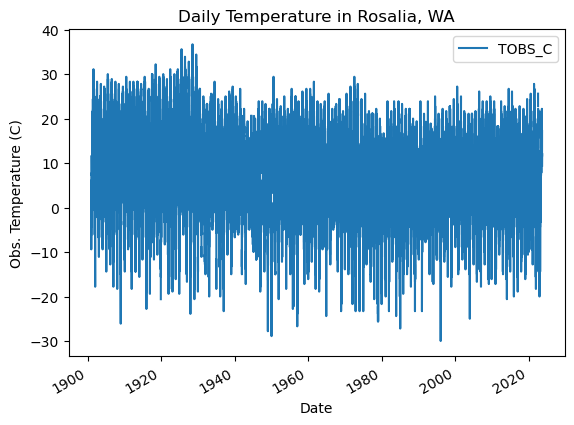

In [99]:
# Plot the daily data
climate_df_w_units.plot(
    y='TOBS_C',
    title='Daily Temperature in Rosalia, WA',
    xlabel='Date',
    ylabel='Obs. Temperature (C)',)

In [100]:
#Resample to annual
ann_climate_df_w_units = climate_df_w_units.resample('YS').mean('TOBS_C')
ann_climate_df_w_units

,TOBS_C
DATE,
1893-01-01,NaN
1894-01-01,NaN
1895-01-01,NaN
1896-01-01,NaN
1897-01-01,NaN
...,...
2019-01-01,5.385625
2020-01-01,6.106358
2021-01-01,6.931176


In [101]:
# Fit an OLS Linear Regression to the data
a_climate_df_rs = ann_climate_df_w_units.reset_index()

# Remove the rows with NaN in temperature
a_climate_df_rs_clean = a_climate_df_rs.dropna(subset=['TOBS_C'])

# Extract the year from the 'DATE' column and use it as the independent variable
a_climate_df_rs_clean['Year'] = pd.to_datetime(a_climate_df_rs_clean['DATE']).dt.year

# Reshape 'Year' column to be a 2D array for scikit-learn
X = a_climate_df_rs_clean[['Year']].values
y = a_climate_df_rs_clean['TOBS_C'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.03919559066341507
Intercept: 83.69420552630073


/tmp/ipykernel_1308/3568256801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_climate_df_rs_clean['Year'] = pd.to_datetime(a_climate_df_rs_clean['DATE']).dt.year


/tmp/ipykernel_1308/589092032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_climate_df_rs_clean['DATE_year'] = a_climate_df_rs_clean['DATE'].dt.year


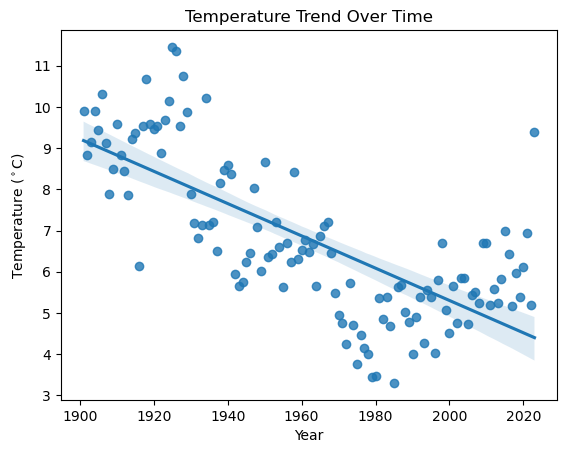

In [102]:
# Plot annual average temperature data with a trend line
# Convert DATE to year only
a_climate_df_rs_clean['DATE_year'] = a_climate_df_rs_clean['DATE'].dt.year

# Plot using the year as x-axis
ax = sns.regplot(
    x=a_climate_df_rs_clean['DATE_year'],  # Use the extracted year
    y=a_climate_df_rs_clean['TOBS_C'].values
)

# Set plot labels
ax.set(
    title='Temperature Trend Over Time in Rosalia WA',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)

# Display the plot without extra text
plt.show()

## An OLS analysis suggests decreasing annual temperatures in Rosalia, WA
Daily temperature observations in Rosalia Washington would suggest a decreasing temperature trend over time. According to an OLS model, the average temperature decrease per year is 0.04 C. In other words, there is a roughly 4 degree C drop in temperatures over the last 100 years of measurements. 

Climate change can show in many ways, but the most well known symptom is rising global temperatures. That does not mean, however, that the temperature increases everywhere. In some regions it is expected the temperature will decrease. Yet, the global average trends upward. Regardless, a change of 0.04 C per year would be considered large. 

In the case of Rosalia Washington, it is not clear if this is a situation of cooling climate or inconsistent data collection combined with a poor model. The site's metadata does not suggest any significant relocations of the measurements. Even so, the annual temperatures plotted above could be divided into three main groups: ~1900 - 1930, ~1930 - 1970, and ~1970 - present. If an OLS model were applied to each tiem period seperatley, it would likely find a positive or neutral trend. A more indepth investigation of the Rosalia data collection site would be needed to better understand this result. 